## Data

In [1]:
# %pip install --upgrade pandas numpy


# Import necessary libraries
import pandas as pd
import numpy as np
import re

# Visualization libraries
# %pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('final_task7_dataset.csv')

# Clean the dataset
df = df.dropna(subset=['review_text'])
df = df[df['review_text'].str.strip() != '']
df = df.dropna(subset=['rating_x'])

# Reset the index
df = df.reset_index(drop=True)

print(f"Dataset shape after cleaning: {df.shape}")
df.head()


Dataset shape after cleaning: (2599, 42)


,place_id,place_name,review_id,review_link,name_x,reviewer_id,reviewer_profile,rating_x,review_text,published_at,...,featured_image,main_category,categories,workday_timing,is_temporarily_closed,closed_on,address,review_keywords,link,query
0,ChIJIRiJaRRawokR2KyQ984qa-o,The Dead Rabbit,ChdDSUhNMG9nS0VJQ0FnTURvdzkyQ3dBRRAB,https://www.google.com/maps/reviews/data=!4m8!...,Itchy Feet Foodies,115364016342485480165,https://www.google.com/maps/contrib/1153640163...,5,Nice bar with great smash burgers and a nice p...,2 hours ago,...,https://lh3.ggpht.com/p/AF1QipM4aUcpwv1i-uOUYl...,Bar,"Bar, Brunch restaurant, Cocktail bar, Event ve...",11 AM-2 AM,NaN,Open All Days,"30 Water St, New York, NY 10004","irish coffee, scotch egg, irish whiskey, sawdu...",https://www.google.com/maps/place/The+Dead+Rab...,bars in manhattan
1,ChIJIRiJaRRawokR2KyQ984qa-o,The Dead Rabbit,ChdDSUhNMG9nS0VJQ0FnTURvcGVuQTVRRRAB,https://www.google.com/maps/reviews/data=!4m8!...,David Bentley,101957826250017754225,https://www.google.com/maps/contrib/1019578262...,5,Finally made there 2 weeks ago. Staff are amaz...,a day ago,...,https://lh3.ggpht.com/p/AF1QipM4aUcpwv1i-uOUYl...,Bar,"Bar, Brunch restaurant, Cocktail bar, Event ve...",11 AM-2 AM,NaN,Open All Days,"30 Water St, New York, NY 10004","irish coffee, scotch egg, irish whiskey, sawdu...",https://www.google.com/maps/place/The+Dead+Rab...,bars in manhattan
2,ChIJIRiJaRRawokR2KyQ984qa-o,The Dead Rabbit,ChZDSUhNMG9nS0VJQ0FnTURva2FHbUVBEAE,https://www.google.com/maps/reviews/data=!4m8!...,"mike ""id"" mm",111715638420955619035,https://www.google.com/maps/contrib/1117156384...,5,Amazing Bar to travel in the mind into the his...,2 days ago,...,https://lh3.ggpht.com/p/AF1QipM4aUcpwv1i-uOUYl...,Bar,"Bar, Brunch restaurant, Cocktail bar, Event ve...",11 AM-2 AM,NaN,Open All Days,"30 Water St, New York, NY 10004","irish coffee, scotch egg, irish whiskey, sawdu...",https://www.google.com/maps/place/The+Dead+Rab...,bars in manhattan
3,ChIJIRiJaRRawokR2KyQ984qa-o,The Dead Rabbit,ChZDSUhNMG9nS0VJQ0FnTURvNGR5LU5REAE,https://www.google.com/maps/reviews/data=!4m8!...,Jake Frith,114589423846334117507,https://www.google.com/maps/contrib/1145894238...,5,Great little bar that serves a great Guinness....,2 days ago,...,https://lh3.ggpht.com/p/AF1QipM4aUcpwv1i-uOUYl...,Bar,"Bar, Brunch restaurant, Cocktail bar, Event ve...",11 AM-2 AM,NaN,Open All Days,"30 Water St, New York, NY 10004","irish coffee, scotch egg, irish whiskey, sawdu...",https://www.google.com/maps/place/The+Dead+Rab...,bars in manhattan
4,ChIJIRiJaRRawokR2KyQ984qa-o,The Dead Rabbit,ChdDSUhNMG9nS0VJQ0FnTURvN296eHRnRRAB,https://www.google.com/maps/reviews/data=!4m8!...,handofwhat,102119327733590225752,https://www.google.com/maps/contrib/1021193277...,2,they have a beautiful illustrated cocktail boo...,3 days ago,...,https://lh3.ggpht.com/p/AF1QipM4aUcpwv1i-uOUYl...,Bar,"Bar, Brunch restaurant, Cocktail bar, Event ve...",11 AM-2 AM,NaN,Open All Days,"30 Water St, New York, NY 10004","irish coffee, scotch egg, irish whiskey, sawdu...",https://www.google.com/maps/place/The+Dead+Rab...,bars in manhattan


In [2]:
#%pip install nltk
#%pip install spacy
#!python -m spacy download en_core_web_sm

## Text Preprocessing

In [3]:
# NLP libraries
import spacy
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))


#preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove punctuation and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize and remove stopwords
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_stop and not token.is_punct]
    # Rejoin tokens into clean string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

df['processed_text'] = df['review_text'].apply(preprocess_text)

print(f"Shape after processing: {df.shape}")
df[['review_text', 'processed_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isabellashaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape after processing: (2599, 43)


,review_text,processed_text
0,Nice bar with great smash burgers and a nice p...,nice bar great smash burger nice pint guinness...
1,Finally made there 2 weeks ago. Staff are amaz...,finally week ago staff amazing especially hann...
2,Amazing Bar to travel in the mind into the his...,amazing bar travel mind history beginning thin...
3,Great little bar that serves a great Guinness....,great little bar serve great guinness service ...
4,they have a beautiful illustrated cocktail boo...,beautiful illustrate cocktail book exist swind...


## TF-IDF vectorization


In [4]:
# %pip install scikit-learn pandas

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Vectorization on reviews grouped by place
grouped = df.groupby('place_name')['processed_text'].apply(lambda x: ' '.join(x)).reset_index()
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)
tfidf_matrix = tfidf.fit_transform(grouped['processed_text'])

print(f"TF-IDF feature matrix shape: {tfidf_matrix.shape}")

# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"Cosine similarity matrix shape: {cosine_sim.shape}")

# Reverse index
indices = pd.Series(grouped.index, index=grouped['place_name']).drop_duplicates()

# Reccomender function
def recommend_places(place_name, cosine_sim=cosine_sim, df=grouped):
    if place_name not in indices:
        return f"Place '{place_name}' not found in the dataset."
     
    idx = indices[place_name]

    # Pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:min(6, len(sim_scores))]  # added min(6, len(sim_scores)) to not go past available data

    place_indices = [i[0] for i in sim_scores]
    return df['place_name'].iloc[place_indices]

# Test Recommender
recommended_bars = recommend_places('The Dead Rabbit')
print("Top recommended similar bars:")
print(recommended_bars)


TF-IDF feature matrix shape: (97, 5000)
Cosine similarity matrix shape: (97, 97)
Top recommended similar bars:
54                                           Pebble Bar
73                                  The Four Faced Liar
42                                        King Cole Bar
1     ART Midtown - Rooftop Bars Midtown, NYC (Arlo ...
83                              The Tailor Public House
Name: place_name, dtype: object


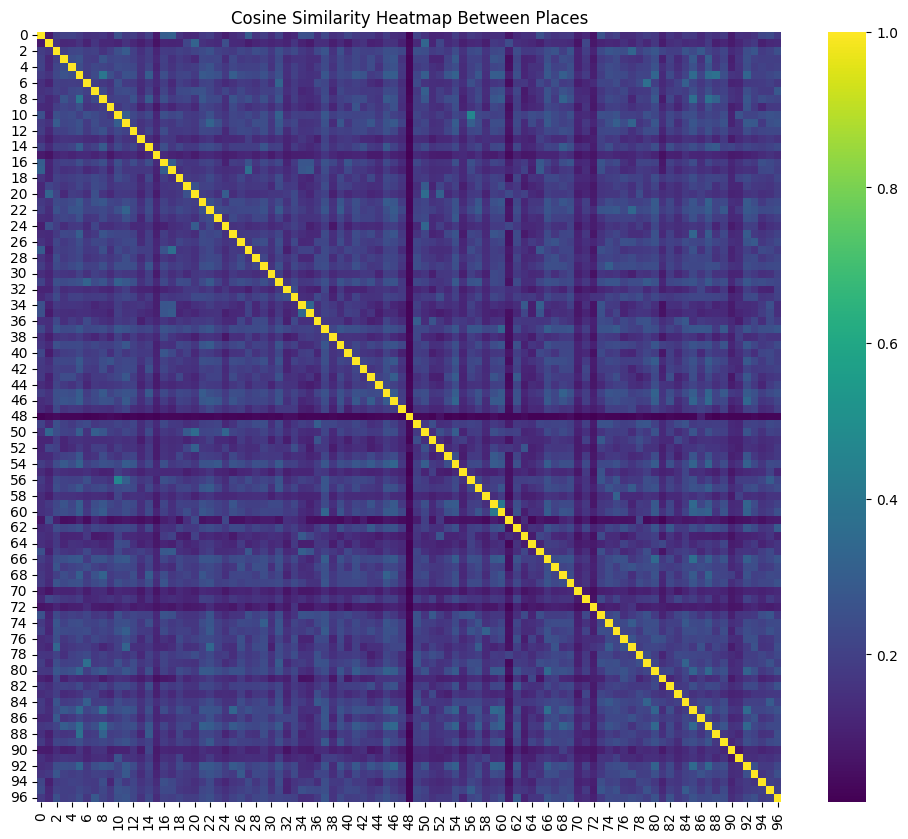

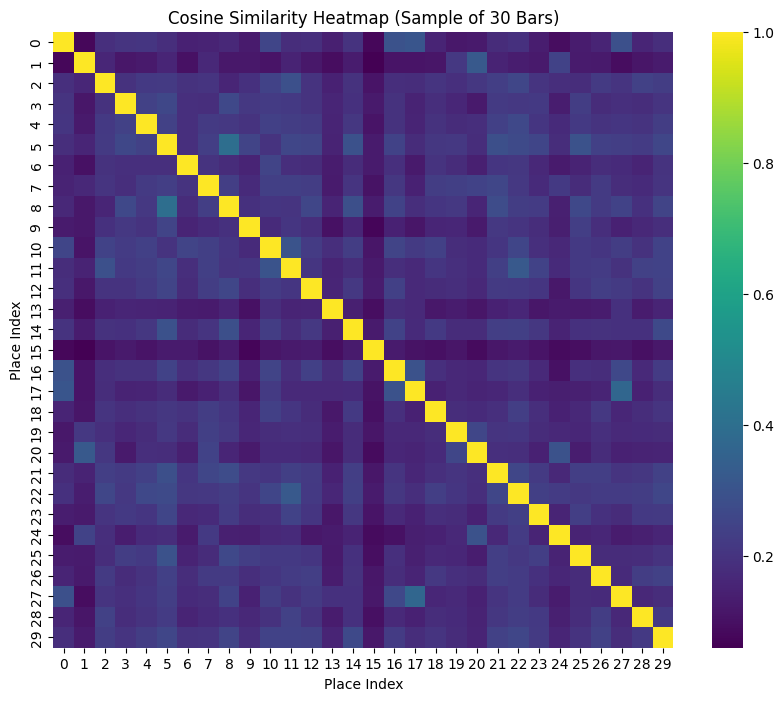

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim, cmap="viridis")
plt.title("Cosine Similarity Heatmap Between Places")
plt.show()

sample_sim = cosine_sim[:30, :30]
plt.figure(figsize=(10, 8))
sns.heatmap(sample_sim, cmap="viridis")
plt.title("Cosine Similarity Heatmap (Sample of 30 Bars)")
plt.xlabel("Place Index")
plt.ylabel("Place Index")
plt.show()


In [33]:
# Save cosine similarity matrix
np.save("cosine_sim.npy", cosine_sim)

# Save the reverse index mapping
indices.to_pickle("place_indices.pkl")

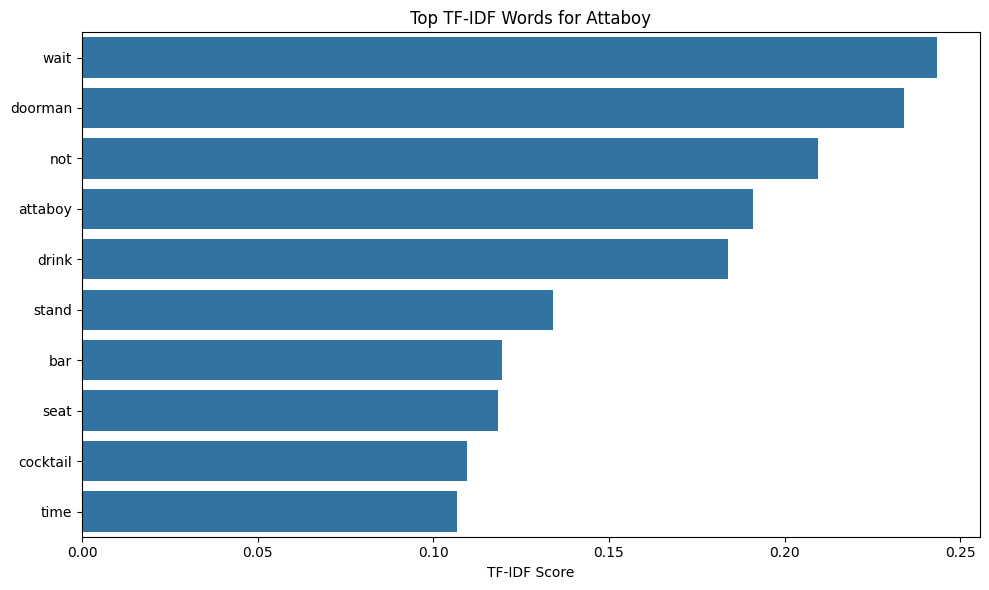

In [48]:
def plot_top_tfidf_words(tfidf_matrix, feature_names, doc_index, top_n=10):
    scores = tfidf_matrix[doc_index].toarray()[0]
    top_indices = scores.argsort()[::-1][:top_n]
    top_words = [feature_names[i] for i in top_indices]
    top_scores = scores[top_indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_scores, y=top_words)
    plt.title(f"Top TF-IDF Words for {grouped['place_name'].iloc[doc_index]}")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.show()


plot_top_tfidf_words(tfidf_matrix, tfidf.get_feature_names_out(), 8)


## Word2Vec vectorization

In [7]:
# %pip install gensim

In [8]:
import gensim
from gensim.models import Word2Vec

# Tokenizing processed text
df['tokens'] = df['processed_text'].apply(lambda x: x.split())

# Training Word2Vec model
w2v_model = Word2Vec(
    sentences=df['tokens'],
    vector_size=100,
    window=5,
    min_count=2,     
    workers=4,      
    sg=1            
)

# Function to average word vectors for a document
def document_vector(doc):
    doc = [word for word in doc if word in w2v_model.wv]
    if len(doc) == 0:
        return np.zeros(100)  # Return zero vector if no valid words
    return np.mean(w2v_model.wv[doc], axis=0)

# Creating document vectors
doc_vectors = np.array([document_vector(tokens) for tokens in df['tokens']])

print(f"Shape of document vectors: {doc_vectors.shape}")


Shape of document vectors: (2599, 100)


In [9]:
# Shape: (2599, 100), where each row is a document vector

# Convert to DataFrame
word2vec_df = pd.DataFrame(doc_vectors)
word2vec_df.columns = [f"w2v_{i}" for i in range(word2vec_df.shape[1])]


df_reset = df.reset_index(drop=True)
# assert len(df_reset) == len(word2vec_df), "Mismatch in row count!" # used to check alignment


df_word2vec = pd.concat([df_reset, word2vec_df], axis=1)


df_word2vec.to_csv("word2vec_reviews.csv", index=False)

print("Word2Vec document vectors saved to 'word2vec_reviews.csv'")
print(f"Final shape: {df_word2vec.shape}")


Word2Vec document vectors saved to 'word2vec_reviews.csv'
Final shape: (2599, 144)


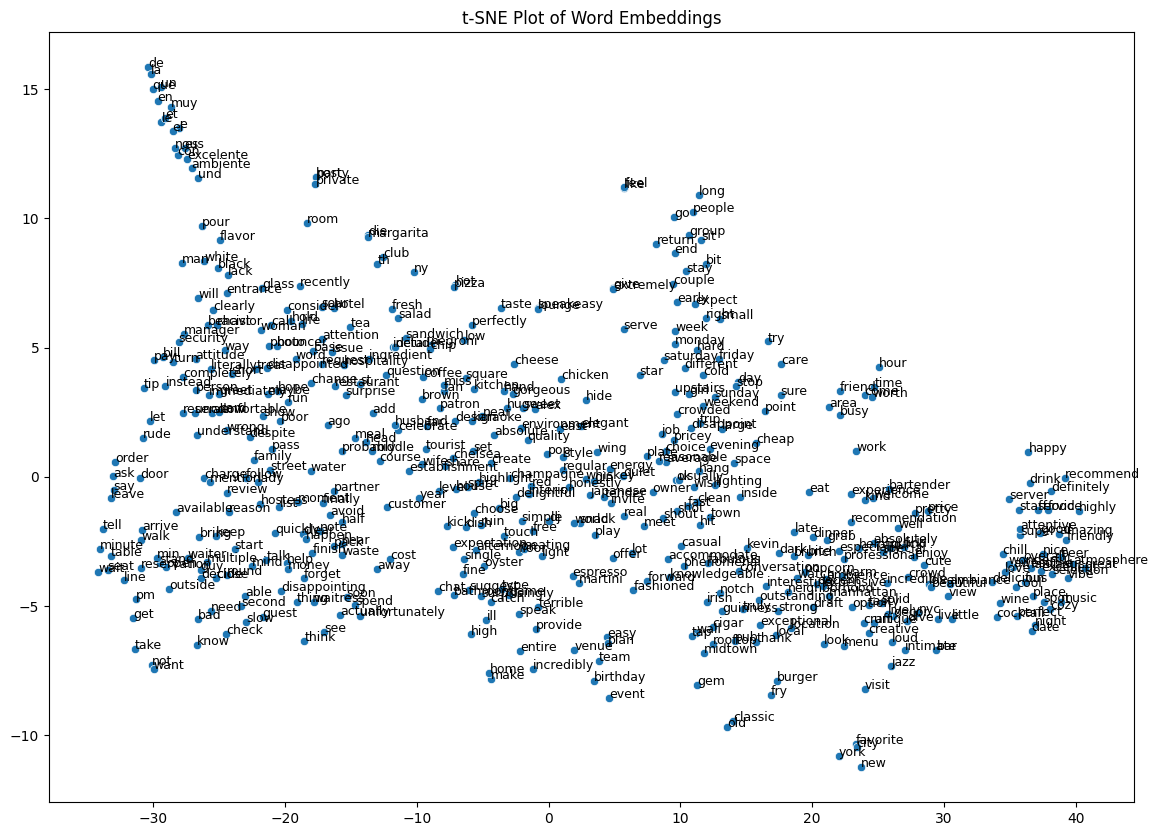

In [49]:
from sklearn.manifold import TSNE
word_vectors = w2v_model.wv
words = list(word_vectors.key_to_index.keys())
vectors = word_vectors[words]

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(vectors[:500])  # first 500 words for clarity

plt.figure(figsize=(14, 10))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1])
for i, word in enumerate(words[:500]):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], word, fontsize=9)
plt.title("t-SNE Plot of Word Embeddings")
plt.show()


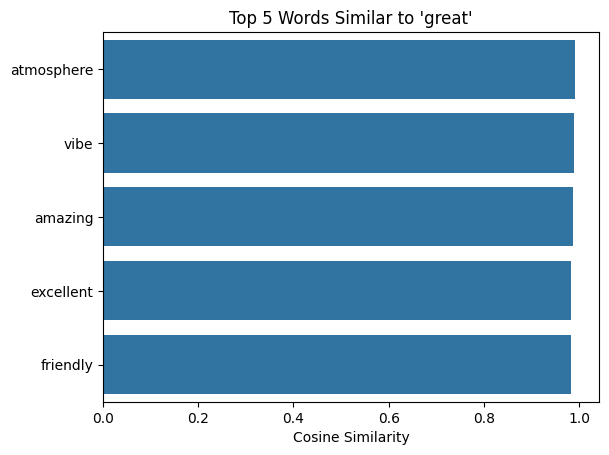

In [60]:
def plot_similar_words(word, top_n=5):
    similar_words = w2v_model.wv.most_similar(word, topn=top_n)
    words, similarities = zip(*similar_words)
    sns.barplot(x=similarities, y=words)
    plt.title(f"Top {top_n} Words Similar to '{word}'")
    plt.xlabel("Cosine Similarity")
    plt.show()

plot_similar_words("great")  



## LDA

In [10]:
from gensim import corpora
from gensim.models import LdaModel

df['tokens'] = df['processed_text'].apply(lambda x: x.split())

# Creating dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5)  
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

NUM_TOPICS = 10
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=NUM_TOPICS,
    passes=10,
    random_state=42,
    per_word_topics=True
)

# Top words for each topic without probabilities 
NUM_TOP_WORDS = 10
for i in range(lda_model.num_topics):
    words = lda_model.show_topic(i, topn=NUM_TOP_WORDS)
    print(f"Topic #{i}: " + ", ".join([word for word, prob in words]))


# Top words with probabilities
for i, topic in lda_model.show_topics(num_topics=NUM_TOPICS, formatted=True):
    print(f"Topic #{i}:")
    print(topic)
    print()

# Assigning dominant topic to each review
def get_dominant_topic(lda_model, bow):
    topics = lda_model.get_document_topics(bow)
    if topics:
        return sorted(topics, key=lambda x: x[1], reverse=True)[0][0]
    else:
        return -1

df['lda_dominant_topic'] = [get_dominant_topic(lda_model, doc) for doc in corpus]

NUM_TOP_WORDS = 5
topic_keywords_map = {
    topic_id: ", ".join([word for word, _ in lda_model.show_topic(topic_id, topn=NUM_TOP_WORDS)])
    for topic_id in range(lda_model.num_topics)
}

# Mapping keywords to reviews
df['topic_keywords'] = df['lda_dominant_topic'].map(topic_keywords_map)

df.to_csv("lda_labeled_reviews.csv", index=False)
print("LDA topics assigned and saved to 'lda_labeled_reviews.csv'")

Topic #0: bar, bartender, not, rude, friend, experience, leave, time, feel, man
Topic #1: wait, come, service, minute, seat, people, hour, place, tell, not
Topic #2: great, drink, spot, cocktail, service, vibe, bar, food, place, delicious
Topic #3: bar, good, great, drink, friendly, staff, atmosphere, nyc, vibe, place
Topic #4: bar, not, cocktail, good, drink, time, reservation, light, want, seat
Topic #5: good, food, drink, cocktail, nice, bar, place, atmosphere, vibe, service
Topic #6: de, la, un, le, que, game, du, nous, et, cheese
Topic #7: recommend, bar, cocktail, experience, highly, amazing, truly, ambiance, creative, offer
Topic #8: not, drink, like, bar, order, ask, place, experience, time, bartender
Topic #9: great, place, night, good, drink, time, spot, bar, service, friend
Topic #0:
0.029*"bar" + 0.021*"bartender" + 0.019*"not" + 0.018*"rude" + 0.013*"friend" + 0.013*"experience" + 0.011*"leave" + 0.011*"time" + 0.010*"feel" + 0.010*"man"

Topic #1:
0.054*"wait" + 0.042*"co

Topic Visualizations

/var/folders/hp/pg12qpzd7vxfd7zpjtl9_k_00000gn/T/ipykernel_93776/3890568322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='muted')


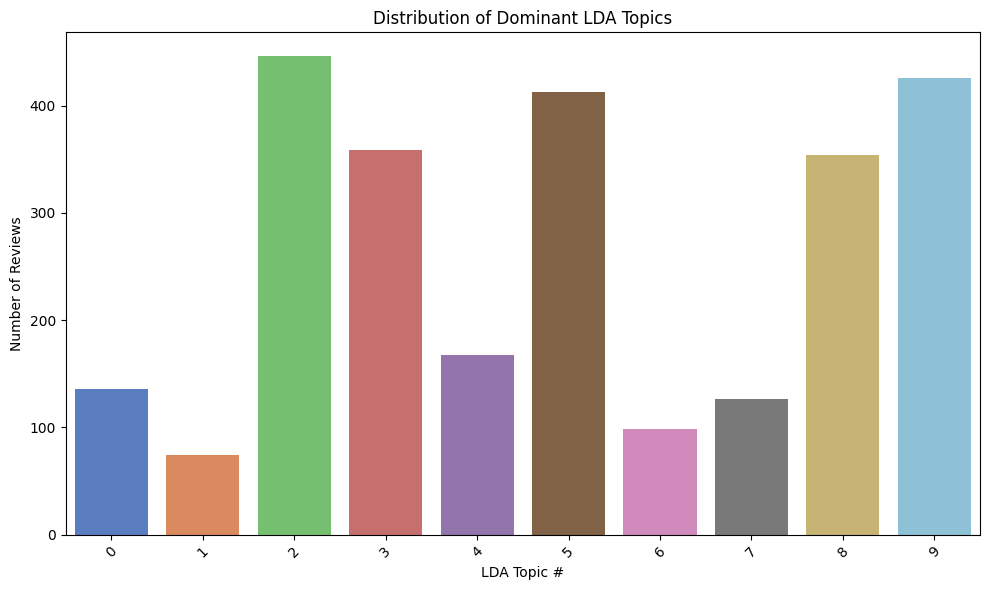

In [ ]:
topic_counts = df['lda_dominant_topic'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='muted')
plt.xlabel('LDA Topic #')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Dominant LDA Topics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

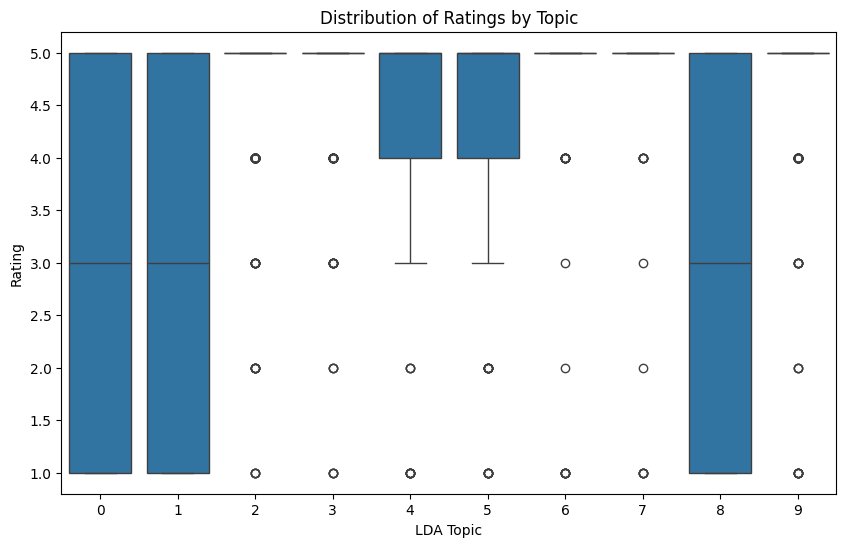

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='lda_dominant_topic', y='rating_x', data=df)
plt.title("Distribution of Ratings by Topic")
plt.xlabel("LDA Topic")
plt.ylabel("Rating")
plt.show()

## Reccomendation System

In [15]:
# %pip install scikit-surprise

df_filtered = df[['reviewer_id', 'place_id', 'rating_x']].dropna()

#### Content-Based TF-IDF Recommender

In [16]:
grouped_reviews = df.groupby('place_name')['processed_text'].apply(lambda x: ' '.join(x)).reset_index()

# TF IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(grouped_reviews['processed_text'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
place_indices = pd.Series(grouped_reviews.index, index=grouped_reviews['place_name']).drop_duplicates()

# Recommender
def recommend_places(place_name, cosine_sim=cosine_sim, df=grouped_reviews):
    idx = place_indices[place_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    place_indices_top = [i[0] for i in sim_scores]
    return df['place_name'].iloc[place_indices_top]

# Examples
print("Content-Based Recommendations:")
print(recommend_places('The Dead Rabbit'))
print(recommend_places('Old Town Bar'))


Content-Based Recommendations:
54                                           Pebble Bar
73                                  The Four Faced Liar
42                                        King Cole Bar
1     ART Midtown - Rooftop Bars Midtown, NYC (Arlo ...
83                              The Tailor Public House
Name: place_name, dtype: object
36    Judge Roy Bean Public House
79                   The Pony Bar
78               The Perfect Pint
84              The Three Monkeys
74                  The High Note
Name: place_name, dtype: object


#### Collaborative Filtering with Surprise

In [17]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the dataset into Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_filtered[['reviewer_id', 'place_id', 'rating_x']], reader)

# Split into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build the model
model = SVD()
model.fit(trainset)

# Evaluate the model
predictions = model.test(testset)
print("\nCollaborative Filtering Evaluation:")
print("RMSE:", accuracy.rmse(predictions))
print("MAE :", accuracy.mae(predictions))


Collaborative Filtering Evaluation:
RMSE: 1.1568
RMSE: 1.1567975855354045
MAE:  0.8582
MAE : 0.8582478593351103


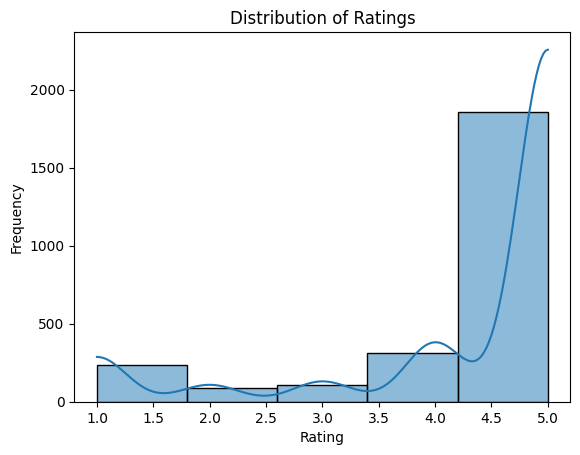

In [63]:
sns.histplot(df_filtered['rating_x'], bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


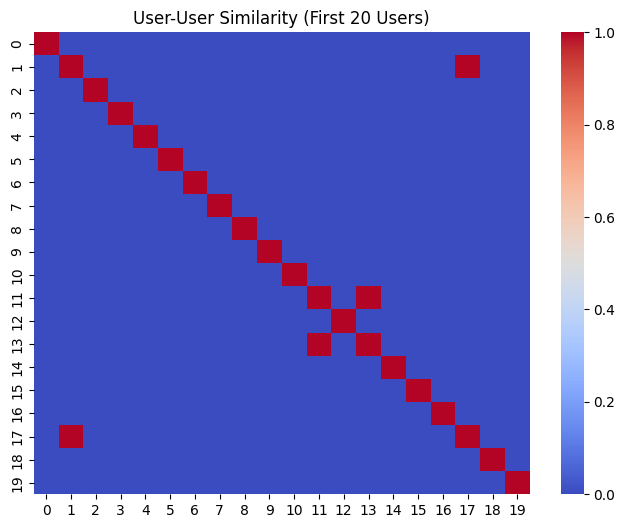

In [18]:
from scipy.spatial.distance import pdist, squareform

user_place_matrix = df.pivot_table(index='reviewer_id', columns='place_id', values='rating_x')
user_place_matrix = user_place_matrix.fillna(0)
user_sim = 1 - squareform(pdist(user_place_matrix, metric='cosine'))

plt.figure(figsize=(8, 6))
sns.heatmap(user_sim[:20, :20], cmap="coolwarm")
plt.title("User-User Similarity (First 20 Users)")
plt.show()


#### Top-N Recommender for User

In [19]:
def get_top_n_recommendations(user_id, model, df_all, n=5):
    all_bars = df_all['place_id'].unique()
    rated_bars = df_all[df_all['reviewer_id'] == user_id]['place_id'].unique()
    bars_to_predict = [bar for bar in all_bars if bar not in rated_bars]
    predictions = [model.predict(user_id, bar) for bar in bars_to_predict]
    top_n_preds = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    place_id_to_name = dict(zip(df_all['place_id'], df_all['place_name']))
    results = [(place_id_to_name.get(pred.iid, pred.iid), round(pred.est, 2)) for pred in top_n_preds]
    return results

# Example
sample_user = df_filtered['reviewer_id'].iloc[0]
print(f"\nTop-N Recommendations for User: {sample_user}")
for place, score in get_top_n_recommendations(sample_user, model, df):
    print(f"{place} — Predicted rating: {score}")


Top-N Recommendations for User: 115364016342485480165
Sofia Wine Bar — Predicted rating: 4.95
The Ragtrader & Bo Peep Cocktail and Highball Store — Predicted rating: 4.87
Albert's Bar — Predicted rating: 4.84
Jimmy's Corner — Predicted rating: 4.83
Pocket Bar NYC — Predicted rating: 4.82


Test Top-N Recommender

In [20]:
# Real user + bar IDs
user_id = '115364016342485480165'
bar_id = 'ChIJXz1QXE5ZwokRLwJIVmQhyEc'

# Lookup dictionary for place_id → place_name
place_id_to_name = dict(zip(df['place_id'], df['place_name']))

# Predicting single rating
pred = model.predict(user_id, bar_id)
bar_name = place_id_to_name.get(bar_id, "Unknown Bar")
print(f"Predicted rating for user '{user_id}' on bar '{bar_name}': {round(pred.est, 2)}")

# Get and print Top-N recommendations for the same user
top_recs = get_top_n_recommendations(user_id, model, df, n=5)
print(f"\nTop 5 recommended bars for user '{user_id}':")
for bar_name, score in top_recs:
    print(f"{bar_name} — Predicted rating: {score}")

Predicted rating for user '115364016342485480165' on bar 'The Dickens': 4.82

Top 5 recommended bars for user '115364016342485480165':
Sofia Wine Bar — Predicted rating: 4.95
The Ragtrader & Bo Peep Cocktail and Highball Store — Predicted rating: 4.87
Albert's Bar — Predicted rating: 4.84
Jimmy's Corner — Predicted rating: 4.83
Pocket Bar NYC — Predicted rating: 4.82


Hybrid Recommender

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Normalize cosine similarity to [0, 1]
scaler = MinMaxScaler()
cosine_sim_normalized = scaler.fit_transform(cosine_sim)


In [22]:
def hybrid_recommender(user_id, place_name, model, cosine_sim=cosine_sim_normalized, df_all=df, n=5, alpha=0.5):

    if place_name not in place_indices:
        return f"Place '{place_name}' not found."
    
    idx = place_indices[place_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    rated_bars = df_all[df_all['reviewer_id'] == user_id]['place_id'].unique()

    hybrid_scores = []
    for i, score in sim_scores:
        bar_name = grouped_reviews['place_name'].iloc[i]
        bar_id = df_all[df_all['place_name'] == bar_name]['place_id'].values[0]
        
        # Skip if already rated
        if bar_id in rated_bars:
            continue
        
        # Predict rating
        try:
            pred = model.predict(user_id, bar_id).est
        except:
            continue
        
        # Hybrid score
        hybrid_score = alpha * score + (1 - alpha) * (pred / 5)  # Normalize prediction to [0, 1]
        hybrid_scores.append((bar_name, round(hybrid_score, 4)))


    top_n = sorted(hybrid_scores, key=lambda x: x[1], reverse=True)[:n]
    return top_n


In [23]:
favorite_place = df[df['reviewer_id'] == user_id].iloc[0]['place_name']

print(f"Hybrid Recommendations for user {user_id}, based on liking '{favorite_place}':")
hybrid_results = hybrid_recommender(user_id, favorite_place, model, n=5, alpha=0.6)
for place, score in hybrid_results:
    print(f" {place} — Hybrid score: {score}")


Hybrid Recommendations for user 115364016342485480165, based on liking 'The Dead Rabbit':
 Rosevale Cocktail Room — Hybrid score: 0.4993
 Albert's Bar — Hybrid score: 0.4831
 Juke Bar — Hybrid score: 0.483
 Death & Co East Village — Hybrid score: 0.4718
 Peter Dillon's 36th — Hybrid score: 0.4688


Schemantic Graphing

In [24]:
# %pip install networkx
import networkx as nx

G = nx.Graph()

for place in df['place_name'].unique():
    G.add_node(place, type='place')


for topic in df['lda_dominant_topic'].dropna().unique():
    G.add_node(f"topic_{int(topic)}", type='topic')


for _, row in df.iterrows():
    G.add_edge(row['place_name'], f"topic_{int(row['lda_dominant_topic'])}", weight=1)


for _, row in df.iterrows():
    for word in row['tokens'][:5]:
        G.add_node(word, type='word')
        G.add_edge(row['place_name'], word, weight=0.5)

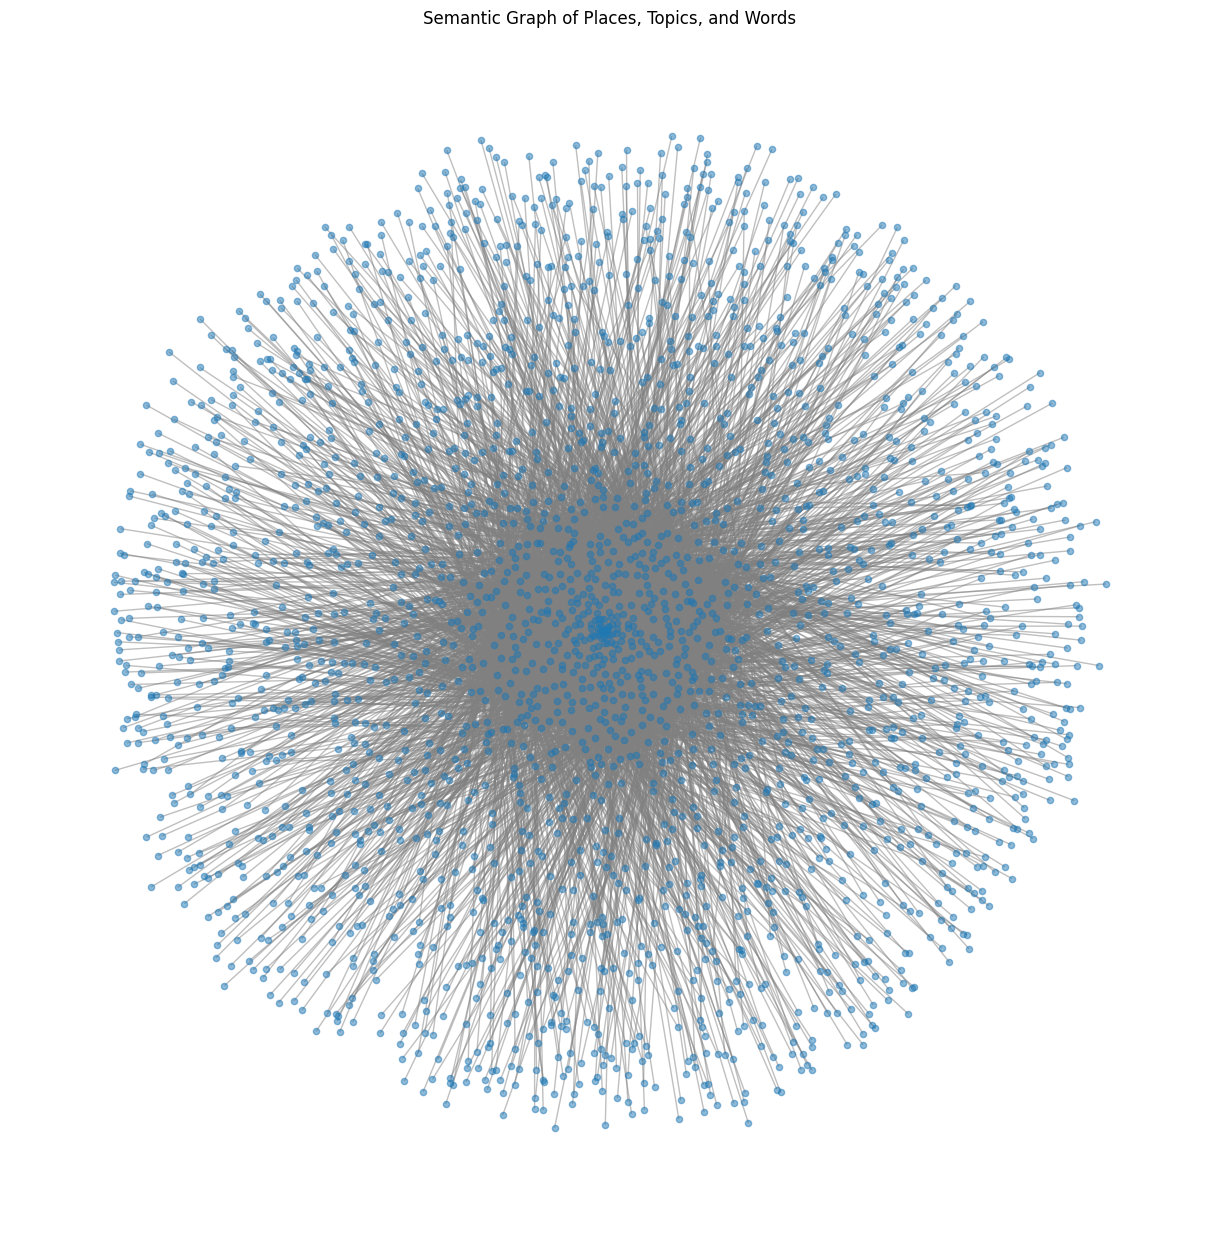

In [25]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, node_size=20, with_labels=False, edge_color="gray", alpha=0.5)
plt.title("Semantic Graph of Places, Topics, and Words")
plt.show()

In [26]:
start_place = "The Dead Rabbit"
pr = nx.pagerank(G, personalization={start_place: 1})

recommended = sorted(
    [(node, score) for node, score in pr.items() if G.nodes[node].get("type") == "place" and node != start_place],
    key=lambda x: x[1],
    reverse=True
)[:5]

print("Graph-based recommendations:")
for name, score in recommended:
    print(f" {name} — Score: {round(score, 4)}")


Graph-based recommendations:
 The Three Monkeys — Score: 0.0063
 The Portrait Bar — Score: 0.0054
 Raines Law Room Chelsea — Score: 0.0053
 Pebble Bar — Score: 0.005
 Blue Ruin Bar — Score: 0.0048


Cold Start Recommender

Top central bars by Degree Centrality:
 all & sundry — Score: 0.051
 King Cole Bar — Score: 0.049
 The Campbell — Score: 0.0482
 The Portrait Bar — Score: 0.0474
 Chez Zou — Score: 0.047


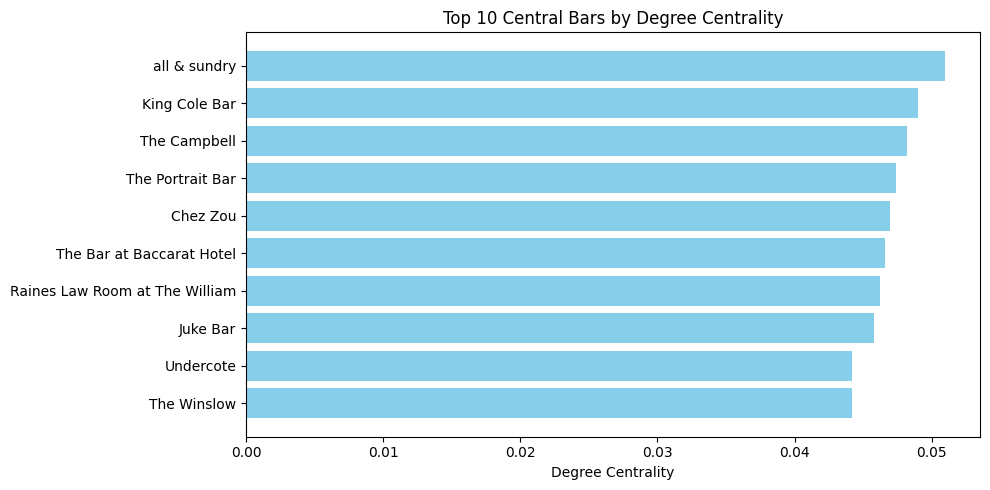

In [27]:
centrality = nx.degree_centrality(G)
sorted_central = sorted([(node, score) for node, score in centrality.items() if G.nodes[node]['type'] == 'place'], key=lambda x: x[1], reverse=True)

print("Top central bars by Degree Centrality:")
for name, score in sorted_central[:5]:
    print(f" {name} — Score: {round(score, 4)}")

top_bars, scores = zip(*sorted_central[:10])
plt.figure(figsize=(10, 5))
plt.barh(top_bars[::-1], scores[::-1], color='skyblue')
plt.title("Top 10 Central Bars by Degree Centrality")
plt.xlabel("Degree Centrality")
plt.tight_layout()
plt.show()

In [28]:
centrality_bars = {
    node: score
    for node, score in centrality.items()
    if G.nodes[node].get("type") == "place"
}
def recommend_cold_start(n=5):
    sorted_bars = sorted(centrality_bars.items(), key=lambda x: x[1], reverse=True)
    return [(bar, round(score, 4)) for bar, score in sorted_bars[:n]]


In [29]:
print("Cold Start Recommendations (No user history):")
for bar, score in recommend_cold_start(n=5):
    print(f" {bar} — Degree Centrality Score: {score}")


Cold Start Recommendations (No user history):
 all & sundry — Degree Centrality Score: 0.051
 King Cole Bar — Degree Centrality Score: 0.049
 The Campbell — Degree Centrality Score: 0.0482
 The Portrait Bar — Degree Centrality Score: 0.0474
 Chez Zou — Degree Centrality Score: 0.047
